In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

from matplotlib import pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings('ignore')

In [87]:
data_raw = pd.read_csv("../data/drug_consumption.data",header=None)

In [88]:
data = data_raw.copy()
print(data.shape)
data.head()

(1885, 32)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1,0.498,0.482,-0.059,0.961,0.126,0.313,-0.575,-0.583,-0.917,-0.007,-0.217,-1.181,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.079,-0.482,1.984,0.961,-0.317,-0.678,1.939,1.435,0.761,-0.143,-0.711,-0.216,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.498,-0.482,-0.059,0.961,-0.317,-0.467,0.805,-0.847,-1.621,-1.014,-1.380,0.401,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.952,0.482,1.164,0.961,-0.317,-0.149,-0.806,-0.019,0.590,0.585,-1.380,-1.181,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.498,0.482,1.984,0.961,-0.317,0.735,-1.633,-0.452,-0.302,1.306,-0.217,-0.216,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


## Fixing the column names

In [89]:
col_names = pd.read_excel(open('../data/drug_consumption_column_mappings.xlsx', 'rb'), sheet_name='col_names')

In [90]:
data = data.rename(columns=dict(zip(col_names.col_number, col_names.col_name)))
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.498,0.482,-0.059,0.961,0.126,0.313,-0.575,-0.583,-0.917,-0.007,-0.217,-1.181,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.079,-0.482,1.984,0.961,-0.317,-0.678,1.939,1.435,0.761,-0.143,-0.711,-0.216,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.498,-0.482,-0.059,0.961,-0.317,-0.467,0.805,-0.847,-1.621,-1.014,-1.380,0.401,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.952,0.482,1.164,0.961,-0.317,-0.149,-0.806,-0.019,0.590,0.585,-1.380,-1.181,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.498,0.482,1.984,0.961,-0.317,0.735,-1.633,-0.452,-0.302,1.306,-0.217,-0.216,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [91]:
recode_vars = ['Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore']
for r in recode_vars:
    temp_df = pd.read_excel(open('../data/drug_consumption_column_mappings.xlsx', 'rb'), sheet_name=f'{r}')
    temp_dict = dict(zip(temp_df.old_value, temp_df.new_value))
    data = data.replace({f'{r}': temp_dict})
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,39.000,36.000,42.000,37.000,42.000,-0.217,-1.181,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25 - 34,Male,Doctorate Degree,UK,White,29.000,52.000,55.000,48.000,41.000,-0.711,-0.216,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,31.000,45.000,40.000,32.000,34.000,-1.380,0.401,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18 - 24,Female,Masters Degree,UK,White,34.000,34.000,46.000,47.000,46.000,-1.380,-1.181,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35 - 44,Female,Doctorate Degree,UK,White,43.000,28.000,43.000,41.000,50.000,-0.217,-0.216,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [92]:
drug_vars = ['Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer']
temp_df = pd.read_excel(open('../data/drug_consumption_column_mappings.xlsx', 'rb'), sheet_name='CLcodes')
CLcodes = dict(zip(temp_df.old_value, temp_df.new_value))
data = data.replace(CLcodes)
data.head()


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,39.000,36.000,42.000,37.000,42.000,-0.217,-1.181,Used in Last Week,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Day,Never Used,Used in Last Week,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,2,25 - 34,Male,Doctorate Degree,UK,White,29.000,52.000,55.000,48.000,41.000,-0.711,-0.216,Used in Last Week,Used in Last Decade,Used in Last Decade,Never Used,Used in Last Day,Used in Last Month,Used in Last Day,Used in Last Year,Never Used,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,31.000,45.000,40.000,32.000,34.000,-1.380,0.401,Used in Last Day,Never Used,Never Used,Never Used,Used in Last Day,Used in Last Year,Used in Last Month,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
3,4,18 - 24,Female,Masters Degree,UK,White,34.000,34.000,46.000,47.000,46.000,-1.380,-1.181,Used in Last Month,Never Used,Never Used,Used in Last Year,Used in Last Week,Used in Last Decade,Used in Last Month,Used in Last Decade,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
4,5,35 - 44,Female,Doctorate Degree,UK,White,43.000,28.000,43.000,41.000,50.000,-0.217,-0.216,Used in Last Month,Used over a Decade Ago,Used over a Decade Ago,Never Used,Used in Last Day,Used in Last Year,Used in Last Day,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used


## Data dictionary

In [93]:
#https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

## Missing values

In [94]:
data.isna().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

### Features

### Categorical

<AxesSubplot:xlabel='Age', ylabel='count'>

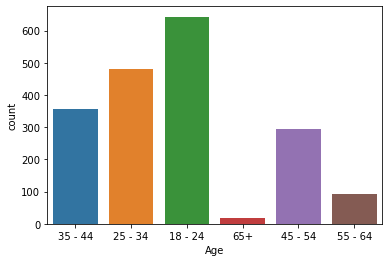

In [95]:
sns.countplot(x="Age", data=data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

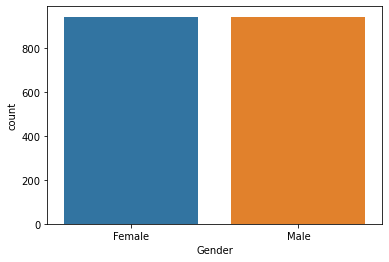

In [96]:
sns.countplot(x="Gender", data=data)

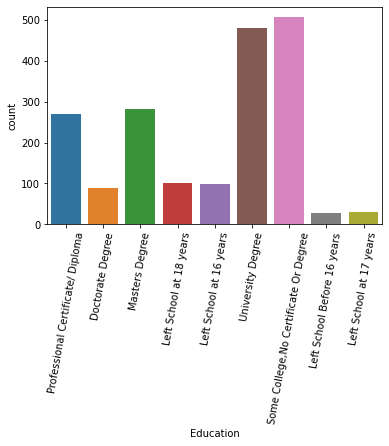

In [97]:
ax = sns.countplot(x="Education", data=data)
ax.tick_params(axis='x', rotation=80)

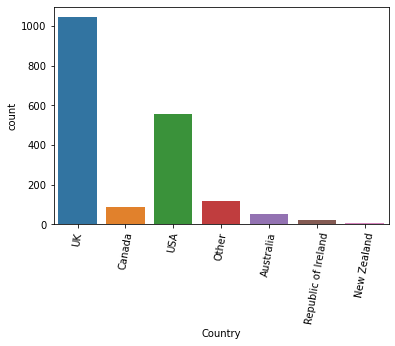

In [98]:
ax = sns.countplot(x="Country", data=data)
ax.tick_params(axis='x', rotation=80)

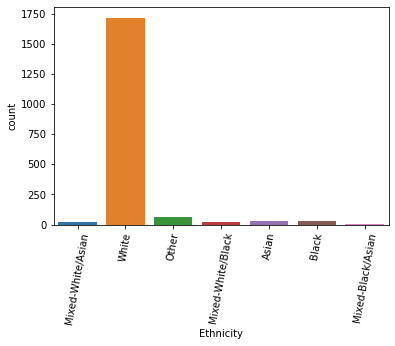

In [99]:
ax =sns.countplot(x="Ethnicity", data=data)
ax.tick_params(axis='x', rotation=80)

### Continuous

In [100]:
data.describe()

,ID,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000
mean,945.295,35.921,39.577,45.199,42.866,41.437,0.007,-0.003
std,545.168,9.136,6.774,7.787,6.438,6.967,0.954,0.964
min,1.000,12.000,16.000,2.153,12.000,17.000,-2.555,-2.078
25%,474.000,29.000,35.000,41.000,39.000,37.000,-0.711,-0.526
50%,946.000,36.000,40.000,46.000,43.000,42.000,-0.217,0.080
75%,1417.000,42.000,44.000,50.000,48.000,46.000,0.530,0.765
max,1888.000,60.000,59.000,60.000,60.000,59.000,2.902,1.922


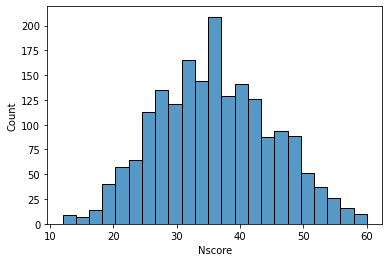

In [101]:
ax = sns.histplot(data.Nscore)#,bins=np.arange(12,24))
#d.ticklabel_format(useOffset=False,style='plain')
#d.tick_params(labelrotation=45)

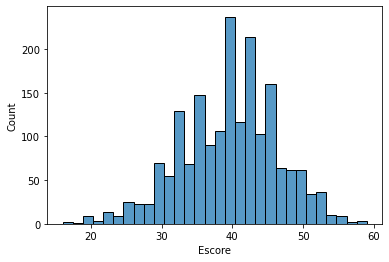

In [102]:
ax = sns.histplot(data.Escore)#,bins=np.arange(12,24))

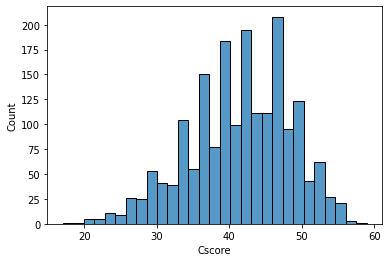

In [103]:
ax = sns.histplot(data.Cscore)#,bins=np.arange(12,24))

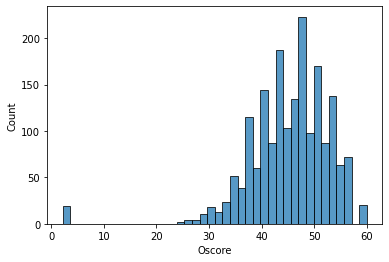

In [104]:
ax = sns.histplot(data.Oscore)#,bins=np.arange(12,24))

In [105]:
data.Oscore.value_counts()

46.000    134
48.000    116
47.000    107
45.000    103
44.000    101
49.000     98
42.000     87
51.000     87
52.000     87
43.000     86
50.000     83
53.000     81
41.000     76
40.000     68
38.000     64
55.000     63
39.000     60
54.000     57
37.000     51
36.000     39
56.000     38
57.000     34
35.000     26
34.000     25
33.000     23
2.153      19
59.000     13
32.000     13
29.000     11
31.000      9
30.000      9
60.000      7
26.000      4
28.000      4
24.000      2
Name: Oscore, dtype: int64

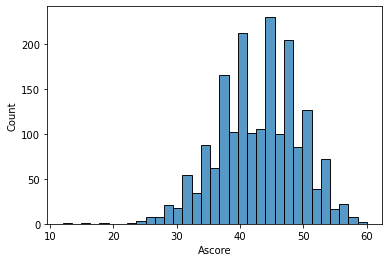

In [106]:
ax = sns.histplot(data.Ascore)#,bins=np.arange(12,24))

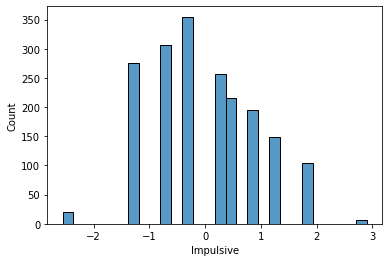

In [107]:
# This varaible is normalized
ax = sns.histplot(data.Impulsive)#,bins=np.arange(12,24))

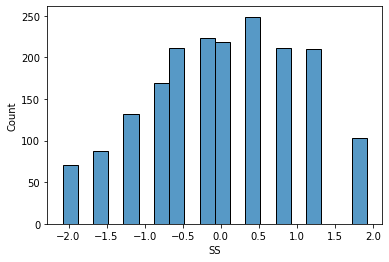

In [108]:
# This variable is normalized
ax = sns.histplot(data.SS)#,bins=np.arange(12,24))

## Target variables

In [109]:
# drug_vars
freq_table = data[drug_vars[0]].value_counts().to_frame()
print(freq_table.index)
for d in drug_vars[1:]:
    temp = data[d].value_counts().to_frame()
    freq_table = freq_table.merge(temp,left_index=True,right_index=True,how='left')
freq_table.head(10)

Index(['Used in Last Week', 'Used in Last Day', 'Used in Last Month',
       'Used in Last Year', 'Used in Last Decade', 'Used over a Decade Ago',
       'Never Used'],
      dtype='object')


,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer
Used in Last Week,759,61,14,84,273,185,683,41,9,63,16,33,64,56,48,40,157,NaN
Used in Last Day,505,102,3,95,1385,463,807,19,2,21,13,4,67,13,73,4,610,NaN
Used in Last Month,287,75,24,120,106,140,296,99,9,156,24,42,110,97,50,115,108,1.000
Used in Last Year,198,198,92,236,60,211,54,258,59,277,65,129,323,214,149,275,185,2.000
Used in Last Decade,68,243,237,234,24,266,10,270,112,234,94,142,198,177,97,260,204,3.000
Used over a Decade Ago,34,230,210,116,10,207,3,160,67,113,68,45,29,259,39,209,193,2.000
Never Used,34,976,1305,1000,27,413,32,1038,1627,1021,1605,1490,1094,1069,1429,982,428,1877.000


In [110]:
data_temp = data.copy()

In [111]:
data_temp = data_temp.filter(items=drug_vars)

In [112]:
def cumulative_record(val):
    if val in ('Used in Last Week', 'Used in Last Day', 'Used in Last Month'):
        return 1
    else:
        return 0
    
for d in drug_vars:
    data_temp[d] = data_temp[d].apply(cumulative_record)

In [113]:
data_temp.head()

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer
0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [114]:
corr = data_temp.corr()
corr

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer
Alcohol,1.000,0.001,0.041,0.008,0.117,0.016,0.065,0.066,0.048,0.073,-0.022,0.049,-0.010,0.027,-0.061,0.031,0.025,0.011
Amphet,0.001,1.000,0.173,0.368,0.067,0.267,-0.004,0.247,0.101,0.248,0.187,0.184,0.328,0.158,0.253,0.172,0.184,0.061
Amyl,0.041,0.173,1.000,0.124,0.039,0.087,0.002,0.177,0.020,0.161,0.019,0.114,0.172,0.018,0.080,0.046,0.102,-0.003
Benzos,0.008,0.368,0.124,1.000,0.049,0.224,-0.028,0.239,0.097,0.148,0.234,0.134,0.234,0.080,0.384,0.114,0.190,0.053
Caff,0.117,0.067,0.039,0.049,1.000,0.046,0.094,0.056,0.006,0.042,0.018,0.022,0.035,0.028,0.030,0.025,0.109,0.006
Cannabis,0.016,0.267,0.087,0.224,0.046,1.000,0.007,0.211,0.112,0.322,0.123,0.123,0.294,0.283,0.182,0.281,0.380,-0.020
Choc,0.065,-0.004,0.002,-0.028,0.094,0.007,1.000,0.012,0.024,0.033,-0.018,0.002,0.019,0.023,-0.042,0.003,-0.005,0.005
Coke,0.066,0.247,0.177,0.239,0.056,0.211,0.012,1.000,0.174,0.377,0.237,0.156,0.158,0.141,0.190,0.135,0.184,0.076
Crack,0.048,0.101,0.020,0.097,0.006,0.112,0.024,0.174,1.000,0.054,0.296,0.082,-0.009,0.059,0.130,0.006,0.070,-0.002
Ecstasy,0.073,0.248,0.161,0.148,0.042,0.322,0.033,0.377,0.054,1.000,0.089,0.254,0.254,0.325,0.057,0.228,0.197,0.060


<AxesSubplot:>

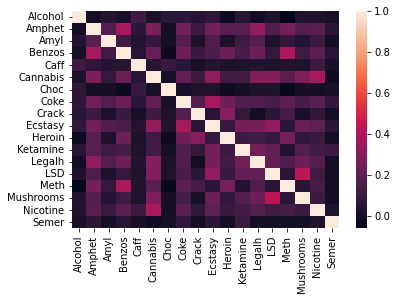

In [115]:
sns.heatmap(corr)

In [116]:
#def calc_target(row, target, drug_vars):
#    for d in drug_vars:
#        if d not in ('Alcohol','Caff','Chocolate'):
#            if row[d] == target:
#                return True
#    return False

#data['used_ilicit_drug_in_last_week'] = data.apply(calc_target,target='Used in Last Week',drug_vars=drug_vars,axis=1)

In [117]:
#data.used_ilicit_drug_in_last_week.value_counts()

True     1014
False     871
Name: used_ilicit_drug_in_last_week, dtype: int64

In [119]:
#data.head()

# Transformation

In [122]:
# Recode age
# Recode Education
# Recode Ethnicity

def recode_Age(val):
    out = val.replace(' ','')
    out = out.replace('-','_')
    out = out.replace('+','plus')
    return out

def recode_Education(val):
    if val == 'Some College,No Certificate Or Degree':
        return 'Some_College'
    elif val == 'University Degree':
        return 'College'
    elif val == 'Masters Degree':
        return 'Masters'
    elif val == 'Doctorate Degree':
        return 'Doctorate'
    elif val == 'Professional Certificate/ Diploma':
        return 'Profess_Diploma'
    elif val == 'Left School at 18 years':
        return 'Left_18'
    elif val == 'Left School at 17 years':
        return 'Left_17'
    elif val == 'Left School at 16 years':
        return 'Left_16'
    elif val == 'Left School Before 16 years':
        return 'Left_Before_16'
    
def recode_Country(val):
    out = val
    if val == 'Republic of Ireland':
        out = 'Ireland'
    elif val == 'New Zealand':
        out = val.replace(' ','_')
    return out

def recode_Ethnicity(val):
    out = val.replace('-','_')
    out = out.replace('/','_')
    return out

In [123]:
data.Age = data.Age.apply(recode_Age)
data.Education = data.Education.apply(recode_Education)
data.Country = data.Country.apply(recode_Country)
data.Ethnicity = data.Ethnicity.apply(recode_Ethnicity)

In [124]:
# Return in this order: 
#   Last_Day, Last_Week, Last_Month, Last_Year, Last_Decade, Over_Decade, Never_Used
def expand_drug_columns(row, drug_name):
    Last_Day = 0
    Last_Week = 0
    Last_Month = 0
    Last_Year = 0
    Last_Decade = 0
    Over_Decade = 0
    Never_Used = 0
    if row[drug_name] == 'Used in Last Day':
        Last_Day = 1
        Last_Week = 1
        Last_Month = 1
        Last_Year = 1
        Last_Decade = 1  
    elif row[drug_name] == 'Used in Last Week':
        Last_Week = 1
        Last_Month = 1
        Last_Year = 1
        Last_Decade = 1         
    elif row[drug_name] == 'Used in Last Month':
        Last_Month = 1
        Last_Year = 1
        Last_Decade = 1 
    elif row[drug_name] == 'Used in Last Year':
        Last_Year = 1
        Last_Decade = 1         
    elif row[drug_name] == 'Used in Last Decade':
        Last_Decade = 1     
    elif row[drug_name] == 'Used over a Decade Ago':
        Over_Decade = 1
    elif row[drug_name] == 'Never Used':
        Never_Used = 1
    return [Last_Day, Last_Week, Last_Month, Last_Year, Last_Decade, Over_Decade, Never_Used]

### Constructing the X matrix

In [125]:
X = pd.DataFrame()

# Continous and ordinal variables
#Nscore	Escore	Oscore	Ascore	Cscore	Impulsive	SS	
#X['Nscore'] = data['Nscore']
#X['Escore'] = data['Escore']
#X['Oscore'] = data['Oscore']
#X['Ascore'] = data['Ascore']
#X['Cscore'] = data['Cscore']
#X['Impulsive'] = data['Impulsive']
#X['SS'] = data['SS']

#Binary variables
X['Male'] = data['Gender'].apply(lambda x: 0 if x=='Female' else 1)

# One-hot encoded variables
# Age
age_one_hot = pd.get_dummies(data['Age'],drop_first=True)
X = pd.merge(X,age_one_hot.add_prefix('Age_'), how='left',left_index=True, right_index=True)
#Education
edu_one_hot = pd.get_dummies(data['Education'],drop_first=True)
X = pd.merge(X,edu_one_hot.add_prefix('Edu_'), how='left',left_index=True, right_index=True)
#Country
country_one_hot = pd.get_dummies(data['Country'],drop_first=True)
X = pd.merge(X,country_one_hot.add_prefix('Country_'), how='left',left_index=True, right_index=True)
#Ethnicity
race_one_hot = pd.get_dummies(data['Ethnicity'],drop_first=True)
X = pd.merge(X,race_one_hot.add_prefix('Race_'), how='left',left_index=True, right_index=True)

In [126]:
time_vars = ['Last_Day', 'Last_Week', 'Last_Month', 'Last_Year', 'Last_Decade', 'Over_Decade', 'Never_Used']
for d in drug_vars:
    new_cols = [d + '_' + t for t in time_vars]
    X[new_cols] = data.apply(expand_drug_columns,drug_name=d,axis=1,result_type='expand')

In [127]:
print(X.shape)
X.head()

(1885, 152)


,Male,Age_25_34,Age_35_44,Age_45_54,Age_55_64,Age_65plus,Edu_Doctorate,Edu_Left_16,Edu_Left_17,Edu_Left_18,Edu_Left_Before_16,Edu_Masters,Edu_Profess_Diploma,Edu_Some_College,Country_Canada,Country_Ireland,Country_New_Zealand,Country_Other,Country_UK,Country_USA,Race_Black,Race_Mixed_Black_Asian,Race_Mixed_White_Asian,Race_Mixed_White_Black,Race_Other,Race_White,Alcohol_Last_Day,Alcohol_Last_Week,Alcohol_Last_Month,Alcohol_Last_Year,Alcohol_Last_Decade,Alcohol_Over_Decade,Alcohol_Never_Used,Amphet_Last_Day,Amphet_Last_Week,Amphet_Last_Month,Amphet_Last_Year,Amphet_Last_Decade,Amphet_Over_Decade,Amphet_Never_Used,Amyl_Last_Day,Amyl_Last_Week,Amyl_Last_Month,Amyl_Last_Year,Amyl_Last_Decade,Amyl_Over_Decade,Amyl_Never_Used,Benzos_Last_Day,Benzos_Last_Week,Benzos_Last_Month,Benzos_Last_Year,Benzos_Last_Decade,Benzos_Over_Decade,Benzos_Never_Used,Caff_Last_Day,Caff_Last_Week,Caff_Last_Month,Caff_Last_Year,Caff_Last_Decade,Caff_Over_Decade,Caff_Never_Used,Cannabis_Last_Day,Cannabis_Last_Week,Cannabis_Last_Month,Cannabis_Last_Year,Cannabis_Last_Decade,Cannabis_Over_Decade,Cannabis_Never_Used,Choc_Last_Day,Choc_Last_Week,Choc_Last_Month,Choc_Last_Year,Choc_Last_Decade,Choc_Over_Decade,Choc_Never_Used,Coke_Last_Day,Coke_Last_Week,Coke_Last_Month,Coke_Last_Year,Coke_Last_Decade,Coke_Over_Decade,Coke_Never_Used,Crack_Last_Day,Crack_Last_Week,Crack_Last_Month,Crack_Last_Year,Crack_Last_Decade,Crack_Over_Decade,Crack_Never_Used,Ecstasy_Last_Day,Ecstasy_Last_Week,Ecstasy_Last_Month,Ecstasy_Last_Year,Ecstasy_Last_Decade,Ecstasy_Over_Decade,Ecstasy_Never_Used,Heroin_Last_Day,Heroin_Last_Week,Heroin_Last_Month,Heroin_Last_Year,Heroin_Last_Decade,Heroin_Over_Decade,Heroin_Never_Used,Ketamine_Last_Day,Ketamine_Last_Week,Ketamine_Last_Month,Ketamine_Last_Year,Ketamine_Last_Decade,Ketamine_Over_Decade,Ketamine_Never_Used,Legalh_Last_Day,Legalh_Last_Week,Legalh_Last_Month,Legalh_Last_Year,Legalh_Last_Decade,Legalh_Over_Decade,Legalh_Never_Used,LSD_Last_Day,LSD_Last_Week,LSD_Last_Month,LSD_Last_Year,LSD_Last_Decade,LSD_Over_Decade,LSD_Never_Used,Meth_Last_Day,Meth_Last_Week,Meth_Last_Month,Meth_Last_Year,Meth_Last_Decade,Meth_Over_Decade,Meth_Never_Used,Mushrooms_Last_Day,Mushrooms_Last_Week,Mushrooms_Last_Month,Mushrooms_Last_Year,Mushrooms_Last_Decade,Mushrooms_Over_Decade,Mushrooms_Never_Used,Nicotine_Last_Day,Nicotine_Last_Week,Nicotine_Last_Month,Nicotine_Last_Year,Nicotine_Last_Decade,Nicotine_Over_Decade,Nicotine_Never_Used,Semer_Last_Day,Semer_Last_Week,Semer_Last_Month,Semer_Last_Year,Semer_Last_Decade,Semer_Over_Decade,Semer_Never_Used
0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,1,1,0,0,1,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1
2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1

In [128]:
X.describe()

,Male,Age_25_34,Age_35_44,Age_45_54,Age_55_64,Age_65plus,Edu_Doctorate,Edu_Left_16,Edu_Left_17,Edu_Left_18,Edu_Left_Before_16,Edu_Masters,Edu_Profess_Diploma,Edu_Some_College,Country_Canada,Country_Ireland,Country_New_Zealand,Country_Other,Country_UK,Country_USA,Race_Black,Race_Mixed_Black_Asian,Race_Mixed_White_Asian,Race_Mixed_White_Black,Race_Other,Race_White,Alcohol_Last_Day,Alcohol_Last_Week,Alcohol_Last_Month,Alcohol_Last_Year,Alcohol_Last_Decade,Alcohol_Over_Decade,Alcohol_Never_Used,Amphet_Last_Day,Amphet_Last_Week,Amphet_Last_Month,Amphet_Last_Year,Amphet_Last_Decade,Amphet_Over_Decade,Amphet_Never_Used,Amyl_Last_Day,Amyl_Last_Week,Amyl_Last_Month,Amyl_Last_Year,Amyl_Last_Decade,Amyl_Over_Decade,Amyl_Never_Used,Benzos_Last_Day,Benzos_Last_Week,Benzos_Last_Month,Benzos_Last_Year,Benzos_Last_Decade,Benzos_Over_Decade,Benzos_Never_Used,Caff_Last_Day,Caff_Last_Week,Caff_Last_Month,Caff_Last_Year,Caff_Last_Decade,Caff_Over_Decade,Caff_Never_Used,Cannabis_Last_Day,Cannabis_Last_Week,Cannabis_Last_Month,Cannabis_Last_Year,Cannabis_Last_Decade,Cannabis_Over_Decade,Cannabis_Never_Used,Choc_Last_Day,Choc_Last_Week,Choc_Last_Month,Choc_Last_Year,Choc_Last_Decade,Choc_Over_Decade,Choc_Never_Used,Coke_Last_Day,Coke_Last_Week,Coke_Last_Month,Coke_Last_Year,Coke_Last_Decade,Coke_Over_Decade,Coke_Never_Used,Crack_Last_Day,Crack_Last_Week,Crack_Last_Month,Crack_Last_Year,Crack_Last_Decade,Crack_Over_Decade,Crack_Never_Used,Ecstasy_Last_Day,Ecstasy_Last_Week,Ecstasy_Last_Month,Ecstasy_Last_Year,Ecstasy_Last_Decade,Ecstasy_Over_Decade,Ecstasy_Never_Used,Heroin_Last_Day,Heroin_Last_Week,Heroin_Last_Month,Heroin_Last_Year,Heroin_Last_Decade,Heroin_Over_Decade,Heroin_Never_Used,Ketamine_Last_Day,Ketamine_Last_Week,Ketamine_Last_Month,Ketamine_Last_Year,Ketamine_Last_Decade,Ketamine_Over_Decade,Ketamine_Never_Used,Legalh_Last_Day,Legalh_Last_Week,Legalh_Last_Month,Legalh_Last_Year,Legalh_Last_Decade,Legalh_Over_Decade,Legalh_Never_Used,LSD_Last_Day,LSD_Last_Week,LSD_Last_Month,LSD_Last_Year,LSD_Last_Decade,LSD_Over_Decade,LSD_Never_Used,Meth_Last_Day,Meth_Last_Week,Meth_Last_Month,Meth_Last_Year,Meth_Last_Decade,Meth_Over_Decade,Meth_Never_Used,Mushrooms_Last_Day,Mushrooms_Last_Week,Mushrooms_Last_Month,Mushrooms_Last_Year,Mushrooms_Last_Decade,Mushrooms_Over_Decade,Mushrooms_Never_Used,Nicotine_Last_Day,Nicotine_Last_Week,Nicotine_Last_Month,Nicotine_Last_Year,Nicotine_Last_Decade,Nicotine_Over_Decade,Nicotine_Never_Used,Semer_Last_Day,Semer_Last_Week,Semer_Last_Month,Semer_Last_Year,Semer_Last_Decade,Semer_Over_Decade,Semer_Never_Used
count,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000,1885.000
mean,0.500,0.255,0.189,0.156,0.049,0.010,0.047,0.053,0.01

# Generate 3 different X and y matrices

In [129]:
X.reset_index(drop=True, inplace=True)

In [130]:
targets = ['Meth', 'LSD', 'Coke']
for t in targets:
    cols_of_interest = [col for col in X if col.startswith(t)]
    target_col_name = t + '_' + 'Last_Month'
    
    X[target_col_name].to_csv(f"../matrices/drug_use/y_{t}.csv")
    X.drop(columns=cols_of_interest).to_csv(f"../matrices/drug_use/X_no_{t}.csv")

## Old target

In [131]:
# Code target as top 25%
#y = data["used_ilicit_drug_in_last_week"].apply(lambda x: 1 if x == True  else 0 )
#print(y.shape)
#print(y.value_counts())